## 0. Intro

데이터 산업의 기술 발전은 스포츠 산업에도 영향을 주고 있다. 대표적인 스포츠 중 하나인 축구에도 영향을 미치고 있는데, 시퀀스(Sequence)라는 개념도 데이터 기술 발전의 결과물 중 하나이다.<br>
축구에서 흔히 보는 데이터는 어떤 것이 있는가? 기본적으로 점유율, 슈팅 및 유효 슈팅 수, 파울 수, 패스 성공 횟수 및 성공률, 오프사이드 횟수 등과 같은 다양한 일회성 및 단순 정보들이 과거때부터 오늘날 까지 접해오는 데이터들이다.
<br><br>
이러한 단순 정보들 역시 물론 의미가 있지만, 이런 데이터들의 특징은 특정 이벤트의 전후 상황에 대한 고려가 되지 않는다는 것이 특징이다. 같은 점유율 데이터도 상대방 진영에서 점유가 많이 이루어졌느냐, 우리팀 진영에서 점유가 이루어 졌는냐에 따라, 유효 슛팅 더나아가 득점으로도 이어지게 되어 있다. 
<br><br>
오늘 날 현대축구에서는 기본적인 데이들을 포함한 양적으로 질적으로 많아지고 다양해지는 데이터에 따라 단순한 수치가 아닌 이벤트의 전후 관계, 즉 연속된 이벤트들에 대한 분석을 하게 되었다. 이에 시퀀스에 대해서 살펴보고 분석을 해보고자 한다.

## 1. What is Sequence?

시퀀스(Sequence)란 플레이의 흐름을 뜻한다.<br>
즉, 한 팀의 한 선수가 공을 컨트롤 하는 액션이 취해지는 순간부터 시퀀스는 시작되며, 상대의 수비 행위, 슈팅, 득점, 경기의 중단 등으로 종료된다.<br> 
모든 시퀀스는 반드시 슈팅과 득점으로 연결되지는 않으며, 상대의 수비 행위로 인해 연결이 종료되었을 때, 파울 등으로 경기가 중단 되었을 때 등 공의 흐름이 시작 되고부터 종료되는 순간 까지를 일컫는 명칭이다.<br><br>
이 시퀀스를 적용하면, 우리는 몇가지 중요한 정보를 찾아낼 수 있다. 어느 팀이 시퀀스 속에서 가장 많은 패스를 시도 하는지, 또는 어떤 팀이 가장 빠른 속도로 시퀀스가 마무리 되는지, 어디서부터 어디까지 전진하는지(거리) 등의 데이터를 정리할 수 있고, 이를 통해 많은 정보를 유추해 낼 수 있다.
<br><br>즉, 그동안 단순 데이터인 패스 횟수, 어시스트, 득점, 킬패스, 크로스 등에서는 알 수 없었던 전, 후에 일어났던 모든 행위를 파악해 볼 수 있고, 이를 통해 한 팀의 특정 패턴, 공격의 방향, 주요 선수 등을 파악해 볼 수 있다.

<style>
  .image-container {
    display: flex;
    justify-content: center;
    align-items: center;
  }
</style>

<div class="image-container">
  <img src="https://www.sportsessionplanner.com/uploads/images/session_transitions/567491.jpg" width="400" height="200">
</div>

## 2. Data Analysis

In [1]:
# 필요 패키지 불러오기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 현대 디렉토리 확인
current_dir = os.getcwd()
current_dir

'/Users/limjongjun/Desktop/JayJay/Growth/Python/soccer-analytics/Excercise'

In [3]:
# Data가 있는 디렉토리로 변경
new_dir = '/Users/limjongjun/Desktop/JayJay/Growth/Python/soccer-analytics'
os.chdir(new_dir)
print(current_dir)

/Users/limjongjun/Desktop/JayJay/Growth/Python/soccer-analytics/Excercise


In [4]:
from src.plot_utils import draw_pitch

### 경기 데이터 불러오기
- PL 18 Round Manchester City vs Tottenham

In [5]:
# Manshester City VS Tottenham Hotspur 경기 불러오기
match_id = 2499895
match_events = pd.read_pickle(f'data/refined_events/England/2499895.pkl') #pkl 파일을 Dataframe으로 불러오기

In [6]:
# 데이터 확인
match_events.head()

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2499895,215108367,1H,1.784,1625,Manchester City,8325,S. Agüero,Pass,Simple pass,[Accurate],52.00,34.68,40.56,34.68
1,2499895,215108368,1H,3.324,1625,Manchester City,105339,Fernandinho,Pass,Simple pass,[Accurate],40.56,34.68,29.12,8.16
2,2499895,215108369,1H,6.406,1625,Manchester City,8277,K. Walker,Pass,Simple pass,[Accurate],29.12,8.16,44.72,10.20
3,2499895,215108370,1H,7.124,1625,Manchester City,38021,K. De Bruyne,Pass,Simple pass,[Accurate],44.72,10.20,69.68,6.12
4,2499895,215108371,1H,8.676,1625,Manchester City,11066,R. Sterling,Pass,Simple pass,[Accurate],69.68,6.12,58.24,12.24


---

### 이벤트 시퀀스 시각화

##### (1) 위치와 무관한 데이터 제외 및 원정팀 공격방향 회전

In [7]:
# 분초 단위로 시간 단위 변경
match_events['display_time'] = match_events.apply(
    lambda x: f"{x['period']} {int(x['time'] // 60):02d}:{int(x['time'] % 60):02d}", axis=1
)
cols = ['period', 'time', 'display_time', 'team_name', 'player_name'] + match_events.columns[8:-1].tolist()

# 선수교체 데이터 제거
match_events = match_events[match_events['event_type'] != 'Substitution'][cols] 

team1_name, team2_name = match_events['team_name'].unique()
team2_x = match_events.loc[match_events['team_name'] == team2_name, ['start_x', 'end_x']]
team2_y = match_events.loc[match_events['team_name'] == team2_name, ['start_y', 'end_y']]


# 양팀 데이터를 한번에 분석할 예정이기에, 2번째 팀의 데이터를 반전
match_events.loc[match_events['team_name'] == team2_name, ['start_x', 'end_x']] = 104 - team2_x
match_events.loc[match_events['team_name'] == team2_name, ['start_y', 'end_y']] = 68 - team2_y

##### (2) 이벤트 시퀀스(event sequence) 단순 시각화

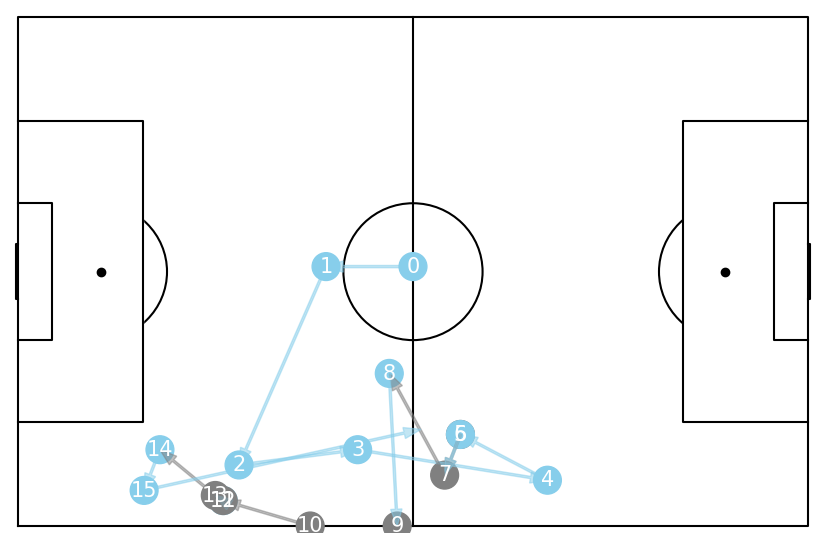

,display_time,team_name,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,1H 00:01,Manchester City,S. Agüero,Pass,Simple pass,[Accurate],52.00,34.68,40.56,34.68
1,1H 00:03,Manchester City,Fernandinho,Pass,Simple pass,[Accurate],40.56,34.68,29.12,8.16
2,1H 00:06,Manchester City,K. Walker,Pass,Simple pass,[Accurate],29.12,8.16,44.72,10.20
3,1H 00:07,Manchester City,K. De Bruyne,Pass,Simple pass,[Accurate],44.72,10.20,69.68,6.12
4,1H 00:08,Manchester City,R. Sterling,Pass,Simple pass,[Accurate],69.68,6.12,58.24,12.24
5,1H 00:09,Tottenham Hotspur,H. Winks,Duel,Ground loose ball duel,"[Won, Accurate]",58.24,12.24,56.16,6.80
6,1H 00:09,Manchester City,K. De Bruyne,Duel,Ground loose ball duel,"[Lost, Not accurate]",58.24,12.24,56.16,6.80
7,1H 00:11,Tottenham Hotspur,D. Rose,Pass,Simple pass,[Not accurate],56.16,6.80,48.88,20.40
8,1H 00:12,Manchester City,K. De Bruyne,Others on the ball,Touch,[Interception],48.88,20.40,49.92,0.00
9,1H 00:15,Tottenham Hotspur,NaN,Interruption,Ball out of the field,[],49.92,0.00,NaN,NaN


In [8]:
first_idx = 0
last_idx = 15

# 시작 index와 종료 index 사이에 있는 모든 이벤트 필터링
seq_events = match_events.loc[first_idx:last_idx]

# 경기장 이미지 함수
draw_pitch('white', 'black')


color_dict = {team1_name: 'skyblue', team2_name: 'grey'}
colors = seq_events['team_name'].apply(lambda x: color_dict[x])
plt.scatter(seq_events['start_x'], seq_events['start_y'], c=colors, s=400)

for i, event in seq_events.iterrows():
    x = event['start_x']
    y = event['start_y']
    plt.annotate(i, xy=[x, y], color='white', ha='center', va='center', fontsize=15)
    if not np.isnan(event['end_x']):
        dx = event['end_x'] - x
        dy = event['end_y'] - y
        color = color_dict[event['team_name']]
        plt.arrow(x, y, dx, dy, width=0.3, head_width=1.5, length_includes_head=True, color=color, alpha=0.5) # 화살표 활성화

plt.show()
seq_events[seq_events.columns[2:]]

- 5,7 / 11,12 같은 경우 Event Tag가 'Duel'로 경합 상황을 의미
- 공의 움직임에 집중하기 위해서 경합 데이터는 중복 제거 필요 
- 또한 경합의 경우 경합의 승패가 확실 하지 않을 때는 중립의 색상으로 시각화 필요

##### (3) 경합(duel) 데이터 처리

- 직후 경합과의 시점/위치 차이 계산 - 같이 발생한 경합의 경우 시점/위치 차이가 적음

In [9]:
# 경합 이벤트 필터링
duels = seq_events[seq_events['event_type'] == 'Duel']

print(duels[['time', 'start_x', 'start_y']].round(3).diff())
print("---")
print(duels[['time', 'start_x', 'start_y']].round(3).diff().shift(-1)) #shift(-1)을 통해 이전(위) 값 위치로 올려줌

      time  start_x  start_y
5      NaN      NaN      NaN
6    0.133      0.0     0.00
11  20.915    -31.2    -8.84
12   0.022      0.0     0.00
---
      time  start_x  start_y
5    0.133      0.0     0.00
6   20.915    -31.2    -8.84
11   0.022      0.0     0.00
12    None      NaN      NaN


- 직후 경합과의 시점/위치 차이로 점수 계산 - 점수가 작으면 직후 경합과 같이 발생한 것이므로 제외 예정

In [10]:
# 행방향으로 절대값을 씌운 후 합계로 집계
diffs = duels[['time', 'start_x', 'start_y']].round(3).diff().shift(-1).fillna(10).abs().sum(axis=1)
diffs

5      0.133
6     60.955
11     0.022
12    30.000
dtype: float64

-> 결과 값이 작은 데이터는 제외 시킨 후 시각화 예정

- 동시에 발생한 여러 개의 경합 중 마지막 기록만 남기고 제외

In [11]:
seq_events_plotted = seq_events.drop(index=duels[diffs < 2].index)
seq_events_plotted

,period,time,display_time,team_name,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,1H,1.784,1H 00:01,Manchester City,S. Agüero,Pass,Simple pass,[Accurate],52.00,34.68,40.56,34.68
1,1H,3.324,1H 00:03,Manchester City,Fernandinho,Pass,Simple pass,[Accurate],40.56,34.68,29.12,8.16
2,1H,6.406,1H 00:06,Manchester City,K. Walker,Pass,Simple pass,[Accurate],29.12,8.16,44.72,10.20
3,1H,7.124,1H 00:07,Manchester City,K. De Bruyne,Pass,Simple pass,[Accurate],44.72,10.20,69.68,6.12
4,1H,8.676,1H 00:08,Manchester City,R. Sterling,Pass,Simple pass,[Accurate],69.68,6.12,58.24,12.24
6,1H,9.415,1H 00:09,Manchester City,K. De Bruyne,Duel,Ground loose ball duel,"[Lost, Not accurate]",58.24,12.24,56.16,6.80
7,1H,11.223,1H 00:11,Tottenham Hotspur,D. Rose,Pass,Simple pass,[Not accurate],56.16,6.80,48.88,20.40
8,1H,12.536,1H 00:12,Manchester City,K. De Bruyne,Others on the ball,Touch,[Interception],48.88,20.40,49.92,0.00
9,1H,15.649,1H 00:15,Tottenham Hotspur,NaN,Interruption,Ball out of the field,[],49.92,0.00,NaN,NaN
10,1H,28.748,1H 00:28,Tottenham Hotspur,D. Rose,Free kick,Throw in,[Accurate],38.48,0.00,27.04,3.40


-> 5, 11 데이터 제거된 것 확인 

- 남겨진 경합 기록의 수행 팀을 중립으로 변경

In [12]:
seq_events_plotted.loc[seq_events_plotted['event_type'] == 'Duel', 'team_name'] = 'Duel'
seq_events_plotted

,period,time,display_time,team_name,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,1H,1.784,1H 00:01,Manchester City,S. Agüero,Pass,Simple pass,[Accurate],52.00,34.68,40.56,34.68
1,1H,3.324,1H 00:03,Manchester City,Fernandinho,Pass,Simple pass,[Accurate],40.56,34.68,29.12,8.16
2,1H,6.406,1H 00:06,Manchester City,K. Walker,Pass,Simple pass,[Accurate],29.12,8.16,44.72,10.20
3,1H,7.124,1H 00:07,Manchester City,K. De Bruyne,Pass,Simple pass,[Accurate],44.72,10.20,69.68,6.12
4,1H,8.676,1H 00:08,Manchester City,R. Sterling,Pass,Simple pass,[Accurate],69.68,6.12,58.24,12.24
6,1H,9.415,1H 00:09,Duel,K. De Bruyne,Duel,Ground loose ball duel,"[Lost, Not accurate]",58.24,12.24,56.16,6.80
7,1H,11.223,1H 00:11,Tottenham Hotspur,D. Rose,Pass,Simple pass,[Not accurate],56.16,6.80,48.88,20.40
8,1H,12.536,1H 00:12,Manchester City,K. De Bruyne,Others on the ball,Touch,[Interception],48.88,20.40,49.92,0.00
9,1H,15.649,1H 00:15,Tottenham Hotspur,NaN,Interruption,Ball out of the field,[],49.92,0.00,NaN,NaN
10,1H,28.748,1H 00:28,Tottenham Hotspur,D. Rose,Free kick,Throw in,[Accurate],38.48,0.00,27.04,3.40


-> 6,12 의 team_nam을 'Duel'로 변경 (중립 색상을 위해서)

##### (4) 경합 데이터 처리를 반영한 이벤트 시퀀스 시각화 함수 구현

In [13]:
# 함수 정의
def visualize_sequence(match_events, first_idx, last_idx, title=None, filename=None, rotate_team2_events=False):
    cols = [
        'period', 'time', 'display_time', 'team_name', 'player_name',
        'event_type', 'sub_event_type', 'tags', 'start_x', 'start_y', 'end_x', 'end_y'
    ]
    
    # 선수 교쳬 데이터 제외
    match_events = match_events[match_events['event_type'] != 'Substitution'][cols] 

    team1_name, team2_name = match_events['team_name'].unique()
    
    # 첫번째 데이터, 마지막 데이터 슬라이싱
    seq_events = match_events.loc[first_idx:last_idx].copy()
    
    # 두번째 팀 데이터 위치 데이터 반전
    if rotate_team2_events:
        team2_idx = seq_events['team_name'] == team2_name
        seq_events.loc[team2_idx, ['start_x', 'end_x']] = 104 - seq_events.loc[team2_idx, ['start_x', 'end_x']]
        seq_events.loc[team2_idx, ['start_y', 'end_y']] = 68 - seq_events.loc[team2_idx, ['start_y', 'end_y']]
    
    # 경합 데이터 처리
    duels = seq_events[seq_events['event_type'] == 'Duel']
    diffs = duels[['time', 'start_x', 'start_y']].diff().shift(-1).fillna(10).abs().sum(axis=1)
    seq_events_plotted = seq_events.drop(index=duels[diffs < 2].index)
    seq_events_plotted.loc[seq_events_plotted['event_type'] == 'Duel', 'team_name'] = 'Duel'

    draw_pitch('white', 'black')
    
    # 경합은 검정색으로 시각화
    color_dict = {team1_name: 'skyblue', team2_name: 'grey', 'Duel': 'black'} 
    colors = seq_events_plotted['team_name'].apply(lambda x: color_dict[x])
    plt.scatter(seq_events_plotted['start_x'], seq_events_plotted['start_y'], c=colors, s=400)

    for i, event in seq_events_plotted.iterrows():
        x = event['start_x']
        y = event['start_y']
        plt.annotate(i % 100, xy=[x, y], color='white', ha='center', va='center', fontsize=15) # 이벤트 id 값이 크기 때문에 % 100 
        if not np.isnan(event['end_x']):
            dx = event['end_x'] - x
            dy = event['end_y'] - y
            color = color_dict[event['team_name']]
            plt.arrow(x, y, dx, dy, width=0.3, head_width=1.5, length_includes_head=True, color=color, alpha=0.5)

    if title is None:
        title = seq_events['display_time'].iloc[-1]
    plt.title(title, fontdict={'size': 20})
    
    if filename is not None:
        plt.savefig(f'img/{filename}', bbox_inches='tight')

    plt.show()
    return seq_events[seq_events.columns[2:-4]]

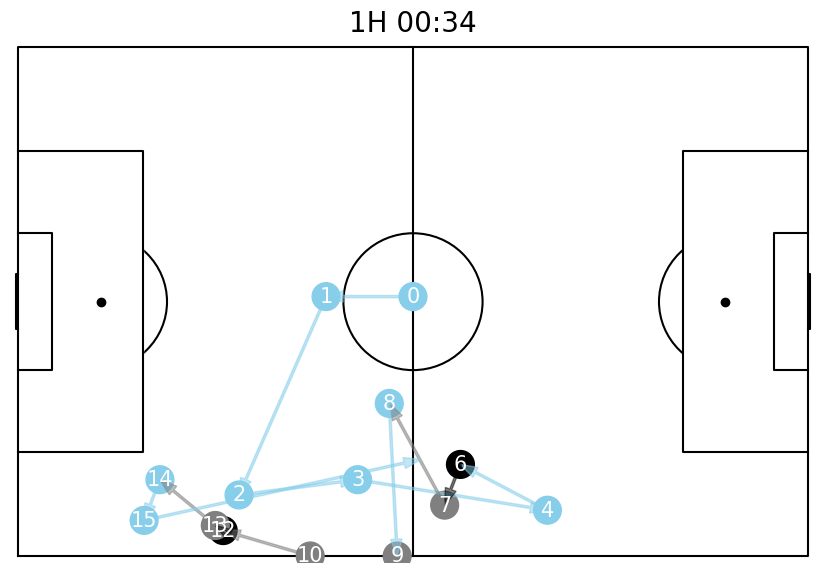

,display_time,team_name,player_name,event_type,sub_event_type,tags
0,1H 00:01,Manchester City,S. Agüero,Pass,Simple pass,[Accurate]
1,1H 00:03,Manchester City,Fernandinho,Pass,Simple pass,[Accurate]
2,1H 00:06,Manchester City,K. Walker,Pass,Simple pass,[Accurate]
3,1H 00:07,Manchester City,K. De Bruyne,Pass,Simple pass,[Accurate]
4,1H 00:08,Manchester City,R. Sterling,Pass,Simple pass,[Accurate]
5,1H 00:09,Tottenham Hotspur,H. Winks,Duel,Ground loose ball duel,"[Won, Accurate]"
6,1H 00:09,Manchester City,K. De Bruyne,Duel,Ground loose ball duel,"[Lost, Not accurate]"
7,1H 00:11,Tottenham Hotspur,D. Rose,Pass,Simple pass,[Not accurate]
8,1H 00:12,Manchester City,K. De Bruyne,Others on the ball,Touch,[Interception]
9,1H 00:15,Tottenham Hotspur,NaN,Interruption,Ball out of the field,[]


In [14]:
visualize_sequence(match_events, 0, 15)

In [15]:
# 득점이 일어난 이벤트 시간 확인
goal_records = match_events[match_events['tags'].apply(lambda x : 'Goal' in x)]
goal_records

,period,time,display_time,team_name,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
299,1H,822.817,1H 13:42,Manchester City,İ. Gündoğan,Shot,Shot,"[Goal, Head/body, Opportunity, Position: Goal ...",95.68,38.76,104.0,34.0
1261,2H,1486.873,2H 24:46,Manchester City,K. De Bruyne,Shot,Shot,"[Goal, Counter attack, Left foot, Opportunity,...",94.64,48.28,104.0,34.0
1434,2H,2094.226,2H 34:54,Manchester City,R. Sterling,Shot,Shot,"[Goal, Counter attack, Right foot, Opportunity...",102.96,29.92,104.0,34.0
1566,2H,2645.632,2H 44:05,Manchester City,R. Sterling,Shot,Shot,"[Goal, Right foot, Opportunity, Position: Goal...",95.68,27.88,104.0,34.0
1600,2H,2826.583,2H 47:06,Tottenham Hotspur,C. Eriksen,Shot,Shot,"[Goal, Left foot, Opportunity, Position: Goal ...",19.76,29.92,0.0,34.0


- Evenvt id = 1261인 K.De Bruyne 득점 시퀀스 시각화

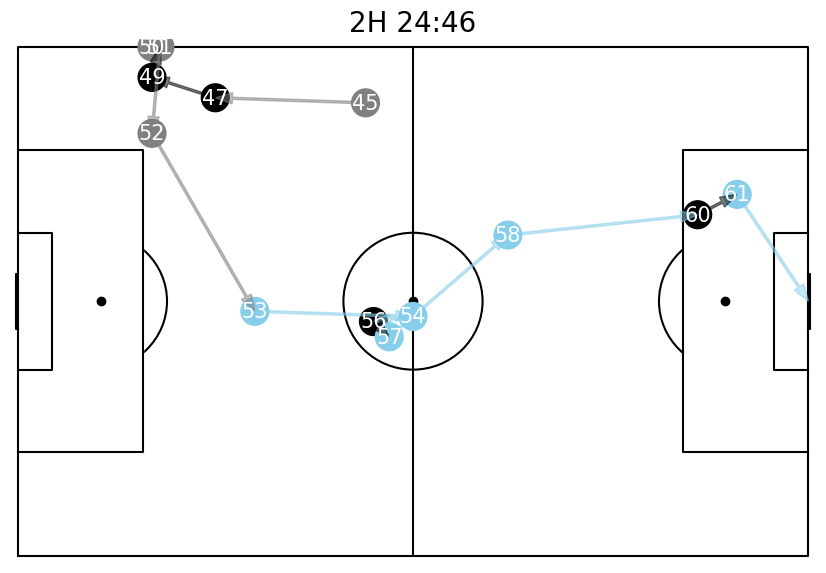

,display_time,team_name,player_name,event_type,sub_event_type,tags
1245,2H 24:19,Tottenham Hotspur,K. Trippier,Pass,Simple pass,[Accurate]
1246,2H 24:21,Tottenham Hotspur,H. Kane,Duel,Ground attacking duel,"[Free space right, Won, Accurate]"
1247,2H 24:21,Manchester City,E. Mangala,Duel,Ground defending duel,"[Free space left, Lost, Not accurate]"
1248,2H 24:23,Manchester City,F. Delph,Duel,Ground defending duel,"[Take on right, Neutral, Accurate]"
1249,2H 24:23,Tottenham Hotspur,H. Kane,Duel,Ground attacking duel,"[Take on left, Neutral, Accurate]"
1250,2H 24:26,Tottenham Hotspur,NaN,Interruption,Ball out of the field,[]
1251,2H 24:32,Tottenham Hotspur,K. Trippier,Free kick,Throw in,[Accurate]
1252,2H 24:34,Tottenham Hotspur,H. Kane,Others on the ball,Touch,[Dangerous ball lost]
1253,2H 24:37,Manchester City,Fernandinho,Pass,Simple pass,[Accurate]
1254,2H 24:39,Manchester City,Gabriel Jesus,Pass,Simple pass,[Accurate]


In [16]:
visualize_sequence(match_events, 1245, 1261)

### 공격 시퀀스 검출 및 시각화

##### (1) 공격 시퀀스(attacking sequence) 검출

- 현재 이벤트와 직전 이벤트를 비교하여 팀 소유권이 유지되는 구간 검출

In [17]:
# 경합 시퀀스는 공격 시퀀스에서 제외
events_except_duels = match_events[match_events['event_type'] != 'Duel']

seq_records = []
event_idxs = [events_except_duels.index[0]]

for i in events_except_duels.index[1:]:
    # 현재 이벤트와 직전 이벤트와 비교
    prev_event = match_events.loc[event_idxs[-1]]
    cur_event = match_events.loc[i]
    if (
        # 전반전 혹은 후반전 내의 같은 기간에 발생해야 함
        cur_event['period'] == prev_event['period'] and
        # 경기 중단 여부
        cur_event['event_type'] != 'Free kick' and
        # 이벤트 간 발생 간격이 15초 이하
        cur_event['time'] - prev_event['time'] < 15 and
        # 같은 팀에서 발생한 이벤트
        cur_event['team_name'] == prev_event['team_name']
    ):
        event_idxs.append(i)
    else:
        # 시퀀스가 끝난 경우 딕셔너리에 데이터 담기
        seq_records.append({
            'team_name': match_events.at[event_idxs[0], 'team_name'],
            'first_idx': event_idxs[0],
            'last_idx': event_idxs[-1]
        })
        event_idxs = [i] #새롭게 시작하는 이벤트 인덱스

# 딕셔너리 데이터들을 DataFrame으로 변환
seq_records = pd.DataFrame(seq_records)
seq_records['len'] = seq_records['last_idx'] - seq_records['first_idx'] + 1
# 이벤트가 2개 이상이 되어야 '시퀀스' 의미 충족
seq_records = seq_records[seq_records['len'] >= 2].reset_index(drop=True)
seq_records

,team_name,first_idx,last_idx,len
0,Manchester City,0,4,5
1,Tottenham Hotspur,10,13,4
2,Manchester City,14,15,2
3,Tottenham Hotspur,20,23,4
4,Tottenham Hotspur,28,34,7
...,...,...,...,...
219,Tottenham Hotspur,1557,1560,4
220,Manchester City,1561,1562,2
221,Tottenham Hotspur,1578,1582,5
222,Manchester City,1587,1595,9


##### (2) 슈팅/득점 시퀀스(shot/goal sequence) 추출

- 공격 시퀀스별 마지막 이벤트 정보 추가

In [18]:
seq_records['last_x'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_x'])
seq_records['last_y'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_y'])
seq_records['last_event_type'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'event_type'])
seq_records['last_event_tags'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'tags'])
seq_records

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
0,Manchester City,0,4,5,69.68,6.12,Pass,[Accurate]
1,Tottenham Hotspur,10,13,4,26.00,4.08,Pass,[Not accurate]
2,Manchester City,14,15,2,16.64,4.76,Pass,[Accurate]
3,Tottenham Hotspur,20,23,4,81.12,2.04,Others on the ball,[Feint]
4,Tottenham Hotspur,28,34,7,18.72,40.12,Foul,[]
...,...,...,...,...,...,...,...,...
219,Tottenham Hotspur,1557,1560,4,28.08,68.00,Interruption,[]
220,Manchester City,1561,1562,2,65.52,4.08,Pass,"[Assist, Through, Not accurate]"
221,Tottenham Hotspur,1578,1582,5,60.32,57.80,Others on the ball,[]
222,Manchester City,1587,1595,9,5.20,40.12,Pass,[Not accurate]


- 슈팅 시퀀스 필터링

In [19]:
seq_records[seq_records['last_event_type'] == 'Shot']

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
34,Manchester City,203,204,2,95.68,25.84,Shot,"[Head/body, Opportunity, Position: Out low rig..."
51,Manchester City,298,299,2,95.68,38.76,Shot,"[Goal, Head/body, Opportunity, Position: Goal ..."
70,Manchester City,449,452,4,88.40,49.64,Shot,"[Left foot, Opportunity, Position: Goal low ce..."
75,Manchester City,498,506,9,91.52,45.56,Shot,"[Counter attack, Right foot, Opportunity, Posi..."
81,Manchester City,544,546,3,91.52,22.44,Shot,"[Right foot, Blocked, Not accurate]"
93,Manchester City,604,606,3,85.28,34.00,Shot,"[Left foot, Opportunity, Position: Out low rig..."
115,Manchester City,771,777,7,90.48,20.40,Shot,"[Counter attack, Left foot, Blocked, Not accur..."
118,Manchester City,790,810,21,76.96,38.08,Shot,"[Right foot, Opportunity, Position: Goal cente..."
137,Tottenham Hotspur,955,960,6,16.64,21.76,Shot,"[Right foot, Blocked, Not accurate]"
147,Tottenham Hotspur,1026,1027,2,23.92,32.64,Shot,"[Right foot, Opportunity, Position: Goal cente..."


- 득점 시퀀스 필터링

In [20]:
seq_records[seq_records['last_event_tags'].apply(lambda x: 'Goal' in x)]

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
51,Manchester City,298,299,2,95.68,38.76,Shot,"[Goal, Head/body, Opportunity, Position: Goal ..."
180,Manchester City,1253,1261,9,94.64,48.28,Shot,"[Goal, Counter attack, Left foot, Opportunity,..."
199,Manchester City,1431,1434,4,102.96,29.92,Shot,"[Goal, Counter attack, Right foot, Opportunity..."


- Manchester City 득점 시퀀스 시각화

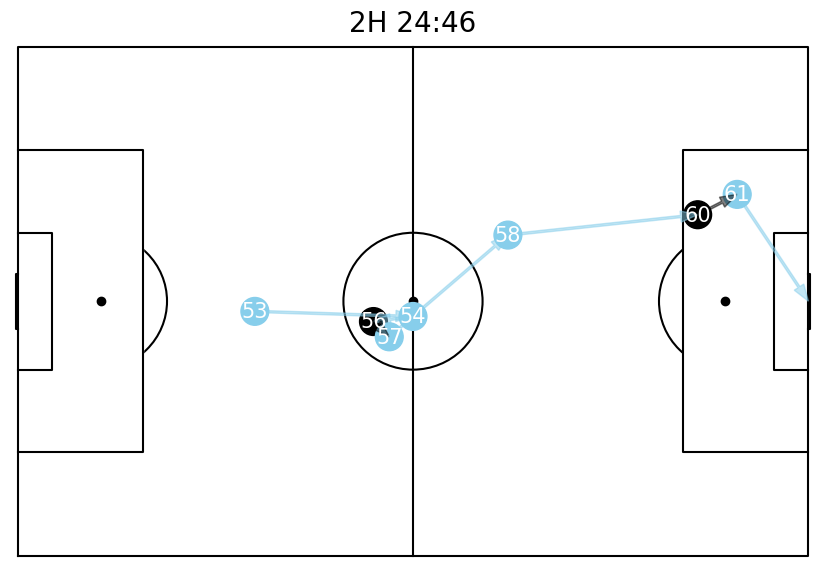

,display_time,team_name,player_name,event_type,sub_event_type,tags
1253,2H 24:37,Manchester City,Fernandinho,Pass,Simple pass,[Accurate]
1254,2H 24:39,Manchester City,Gabriel Jesus,Pass,Simple pass,[Accurate]
1255,2H 24:39,Manchester City,R. Sterling,Duel,Ground attacking duel,"[Won, Accurate]"
1256,2H 24:39,Tottenham Hotspur,M. Dembélé,Duel,Ground defending duel,"[Lost, Not accurate]"
1257,2H 24:41,Manchester City,Gabriel Jesus,Pass,Simple pass,"[Counter attack, Accurate]"
1258,2H 24:42,Manchester City,İ. Gündoğan,Pass,Simple pass,"[Counter attack, Accurate]"
1259,2H 24:45,Tottenham Hotspur,E. Dier,Duel,Ground defending duel,"[Free space right, Lost, Not accurate]"
1260,2H 24:45,Manchester City,K. De Bruyne,Duel,Ground attacking duel,"[Counter attack, Free space left, Won, Accurate]"
1261,2H 24:46,Manchester City,K. De Bruyne,Shot,Shot,"[Goal, Counter attack, Left foot, Opportunity,..."


In [21]:
seq_id = 180
first_idx = seq_records.at[seq_id, 'first_idx']
last_idx = seq_records.at[seq_id, 'last_idx']
visualize_sequence(match_events, first_idx, last_idx)

##### (3) 전체 슈팅 시퀀스 시각화

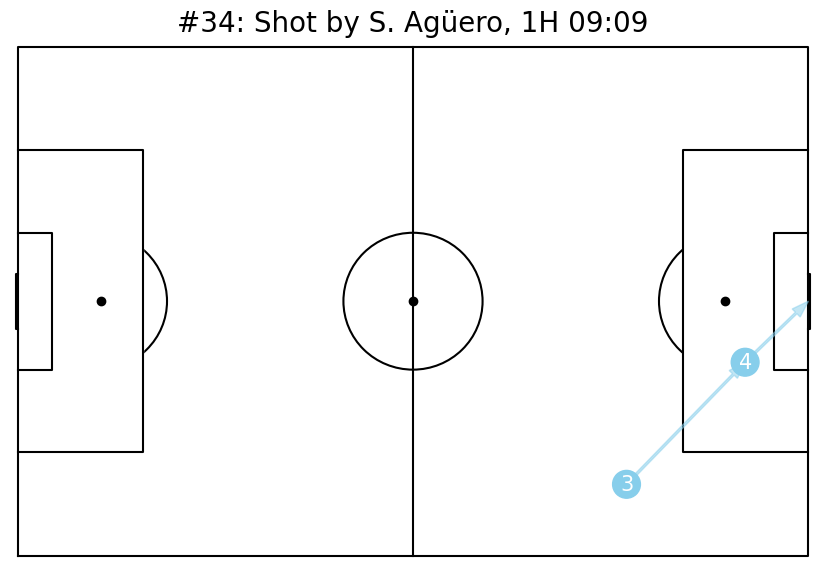

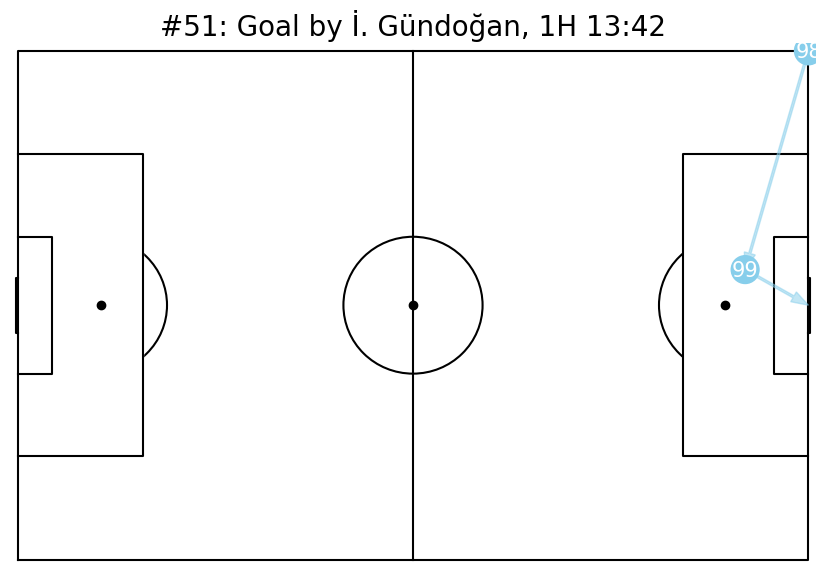

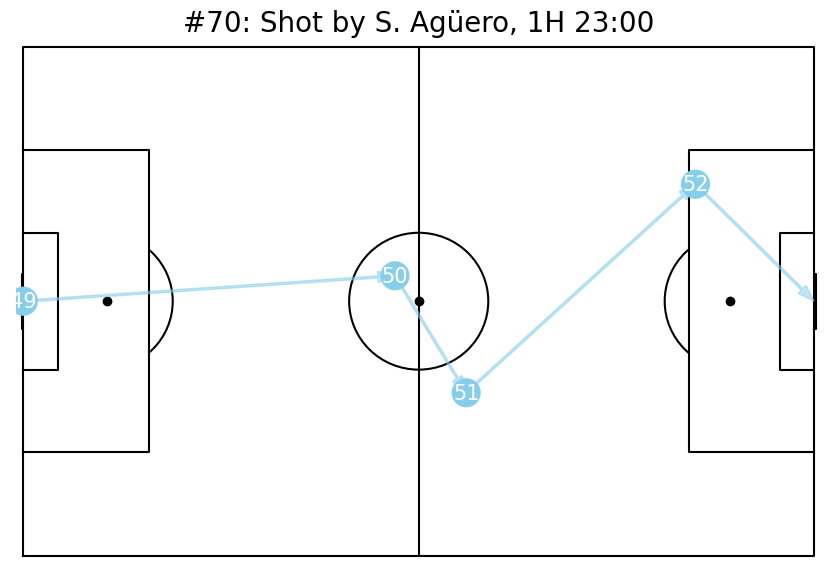

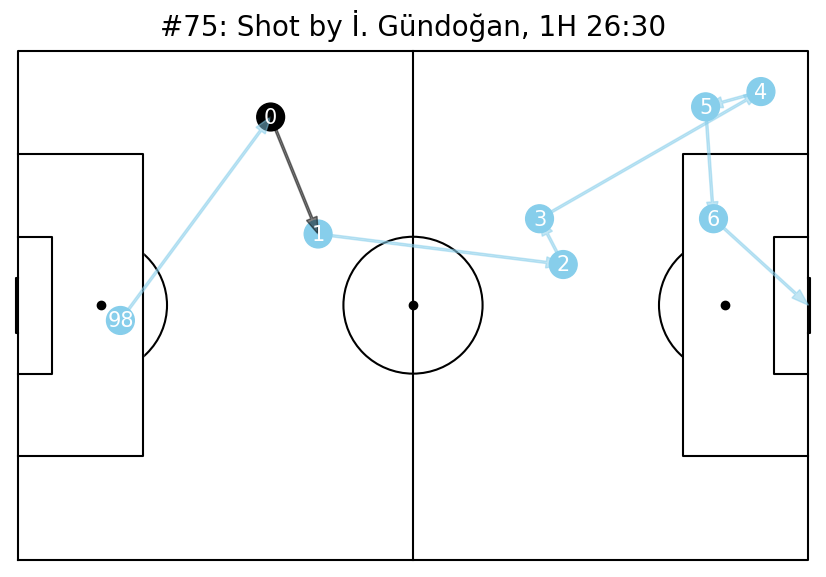

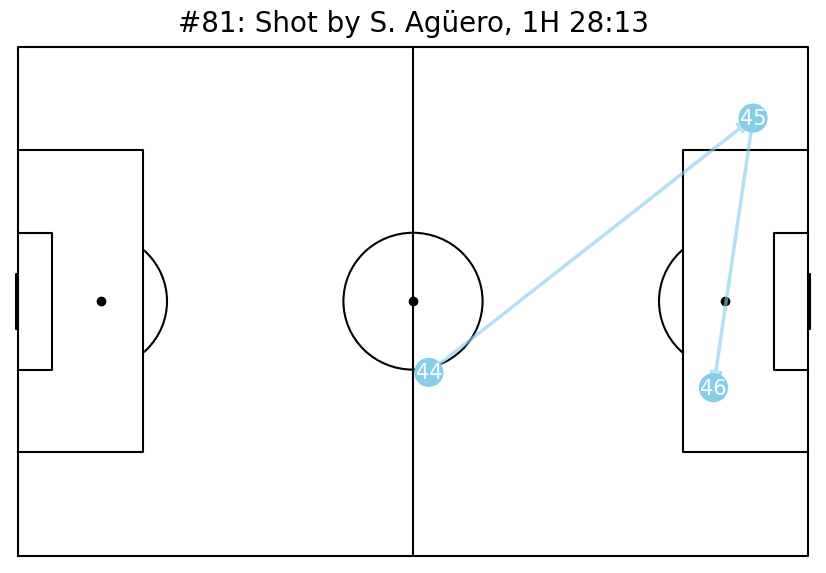

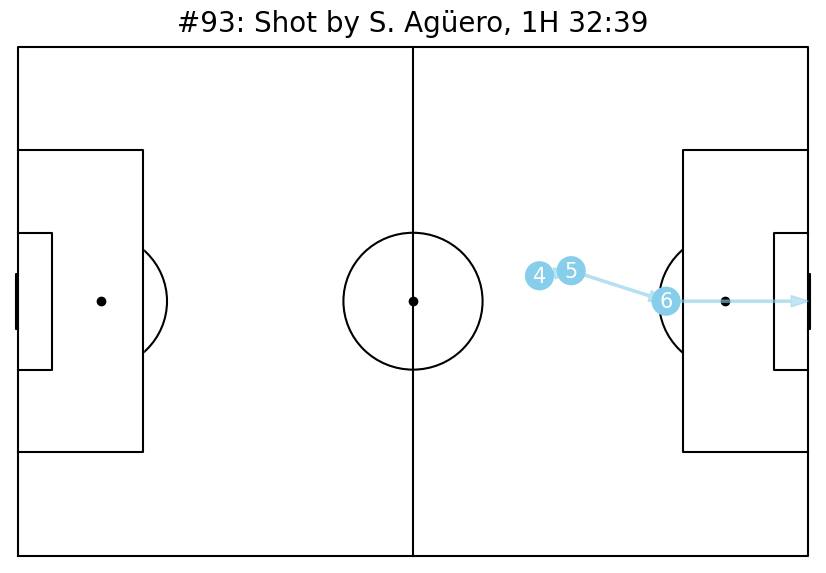

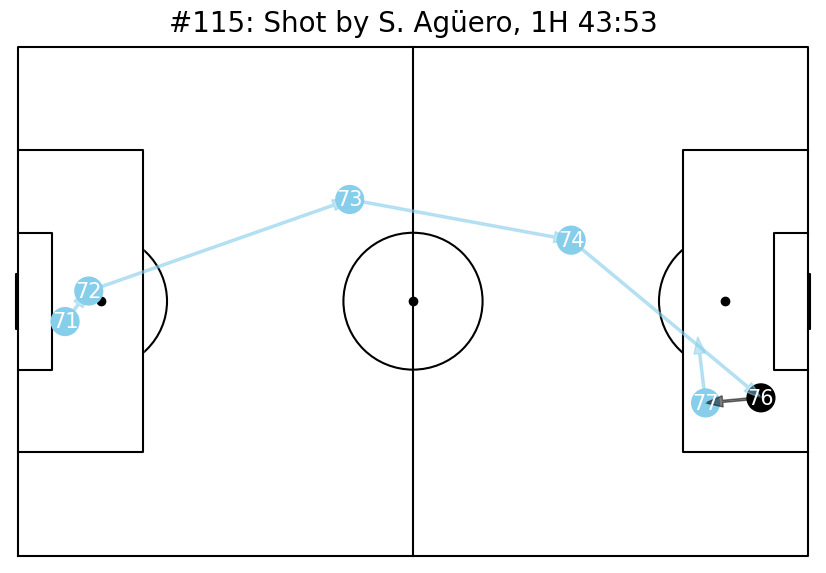

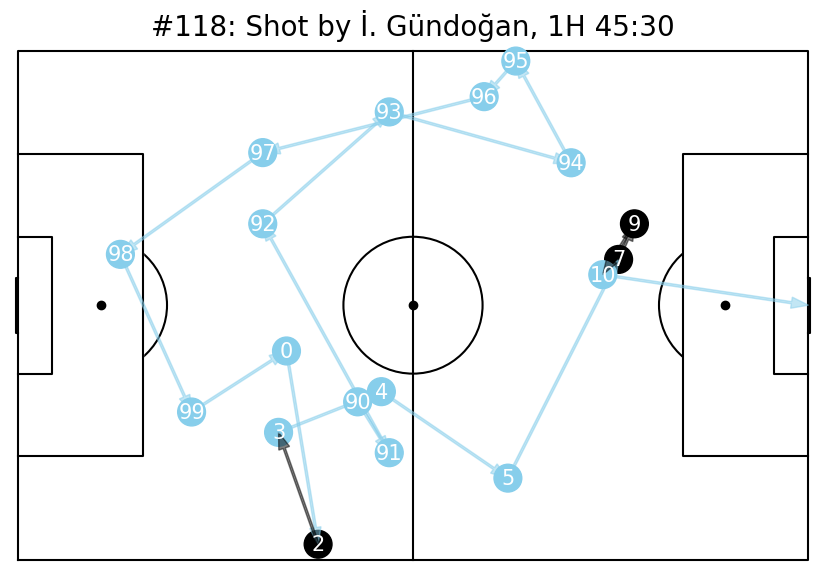

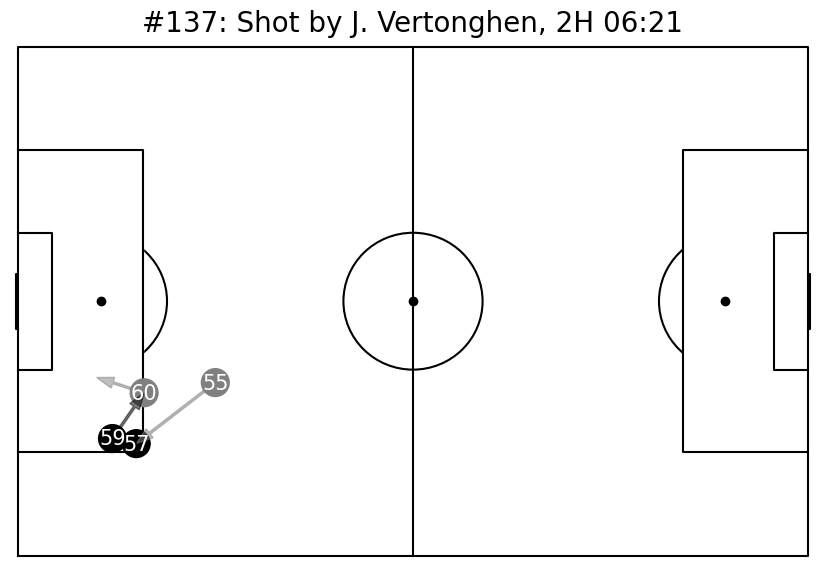

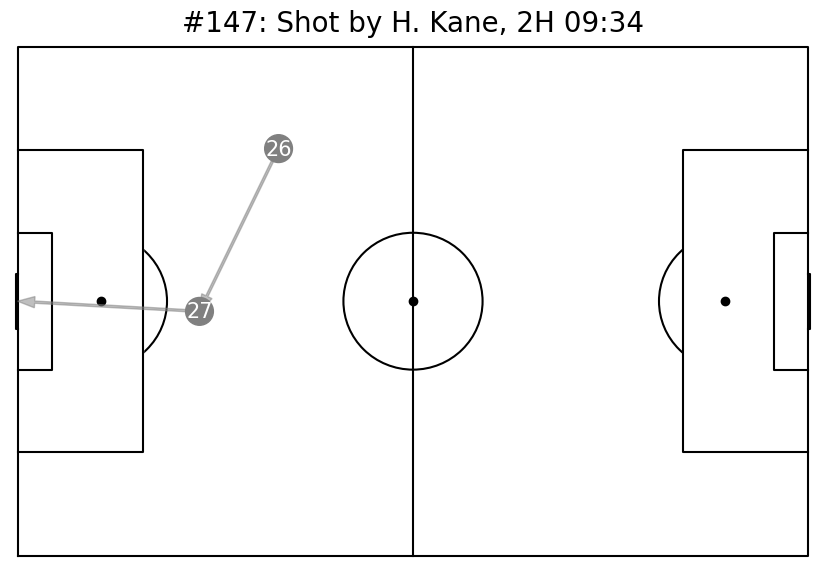

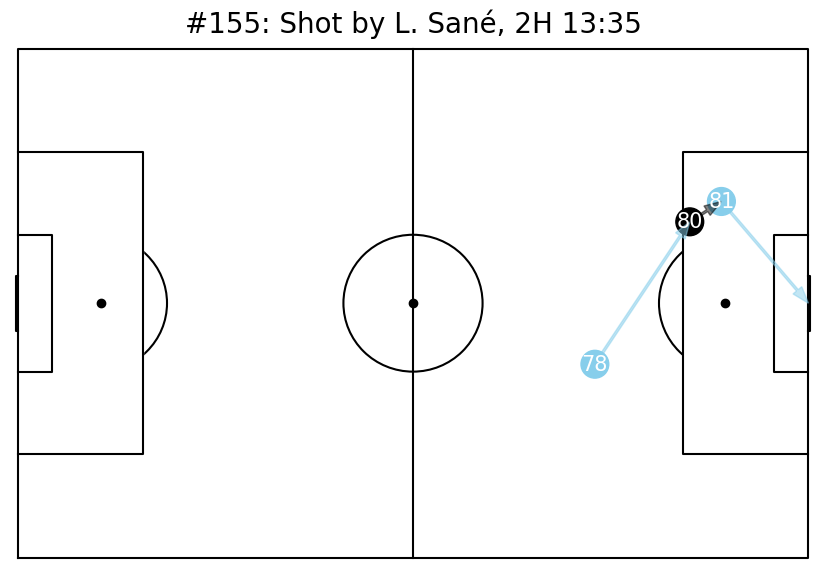

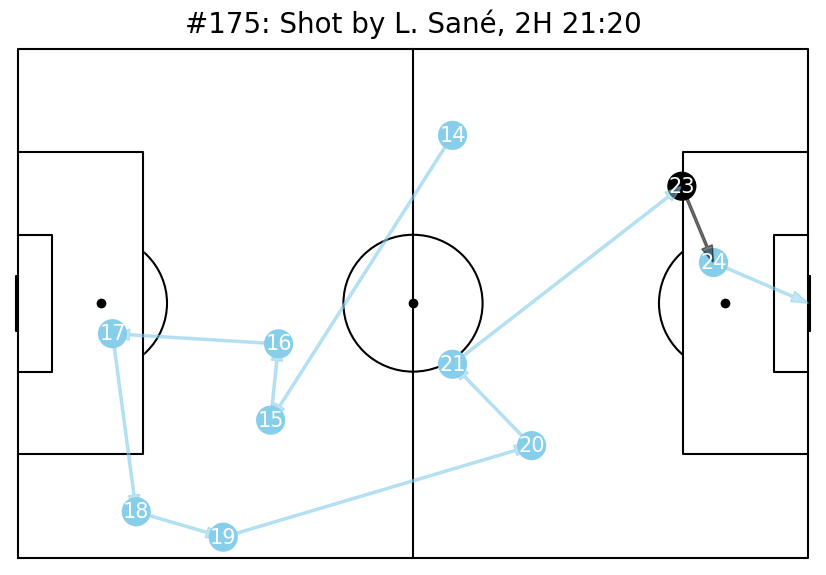

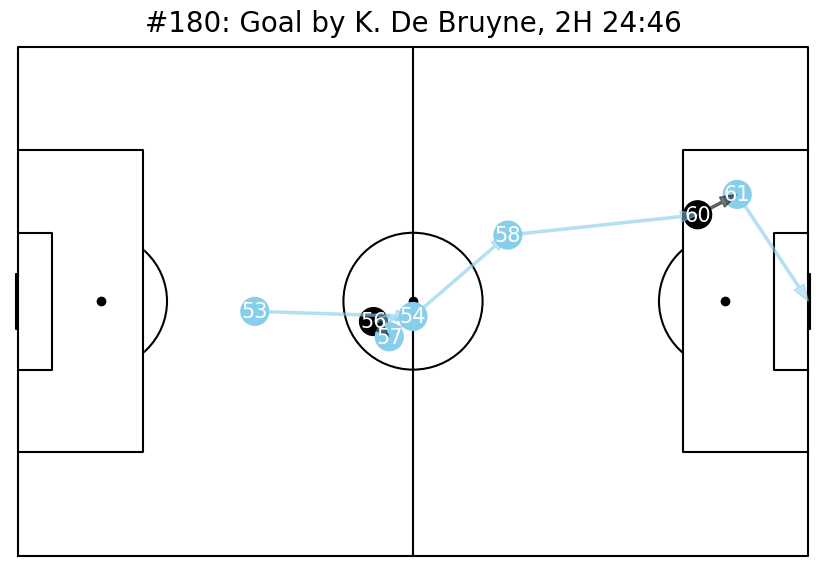

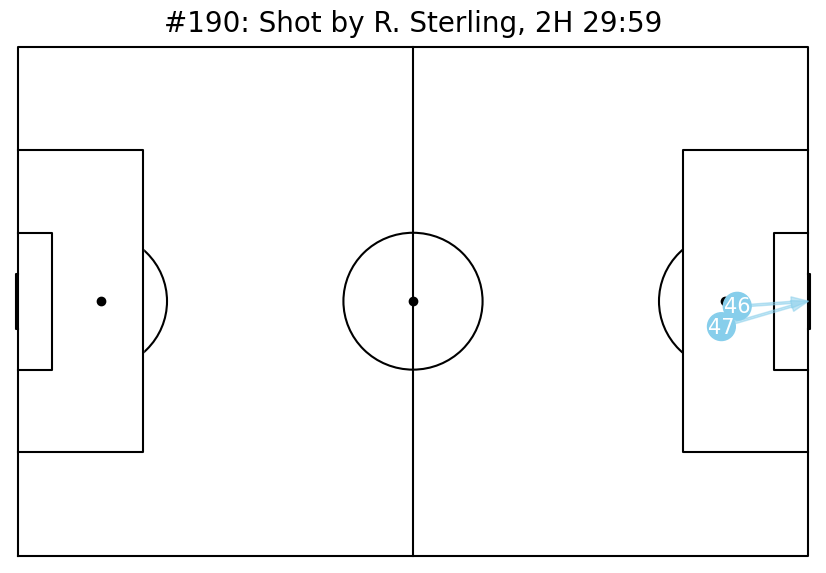

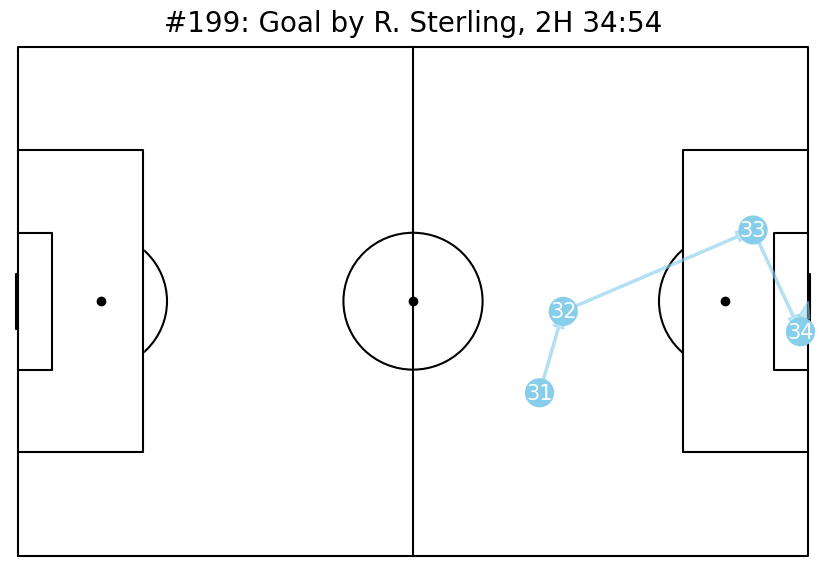

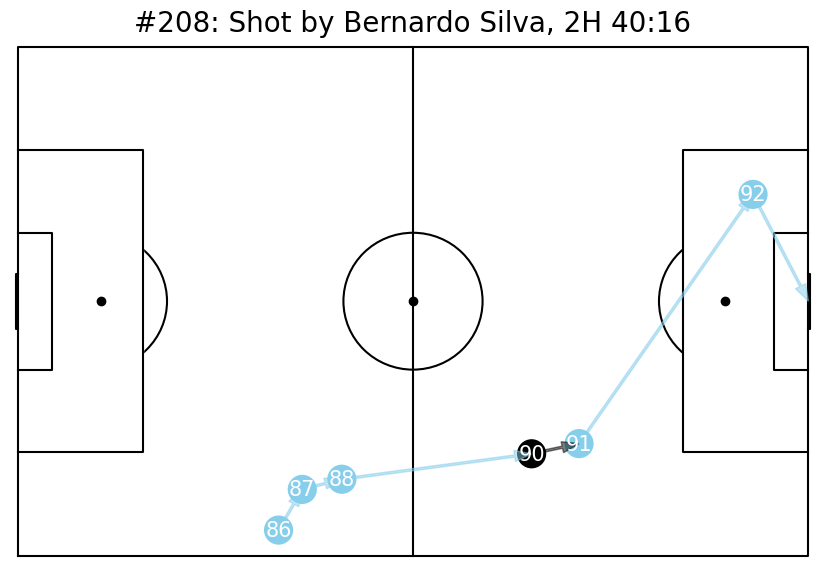

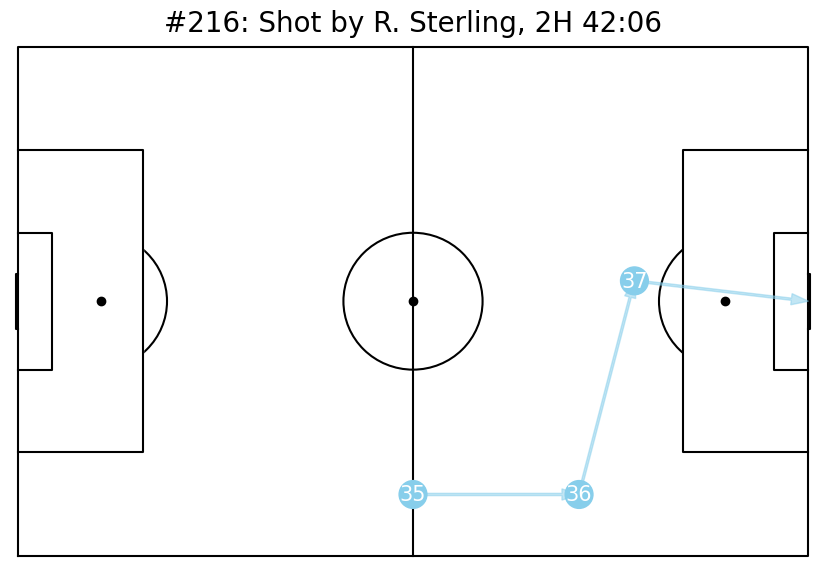

In [22]:
shot_seq_records = seq_records[seq_records['last_event_type'] == 'Shot']

for i in shot_seq_records.index:
    first_idx = seq_records.at[i, 'first_idx']
    last_idx = seq_records.at[i, 'last_idx']

    last_event_time = match_events.at[last_idx, 'display_time']
    last_event_type = match_events.at[last_idx, 'event_type']
    last_event_player = match_events.at[last_idx, 'player_name']
    last_event_tags = match_events.at[last_idx, 'tags']

    if 'Goal' in last_event_tags:
        title = f"#{i}: Goal by {last_event_player}, {last_event_time}"
    else:
        title = f"#{i}: {last_event_type} by {last_event_player}, {last_event_time}"

    visualize_sequence(match_events, first_idx, last_idx, title)

##### (4) 최장 공격 시퀀스 시각화
- 공격 시퀀스 중에서 길이 기준으로 내림차순 정렬 후 상위 5개 시퀀스 시각화

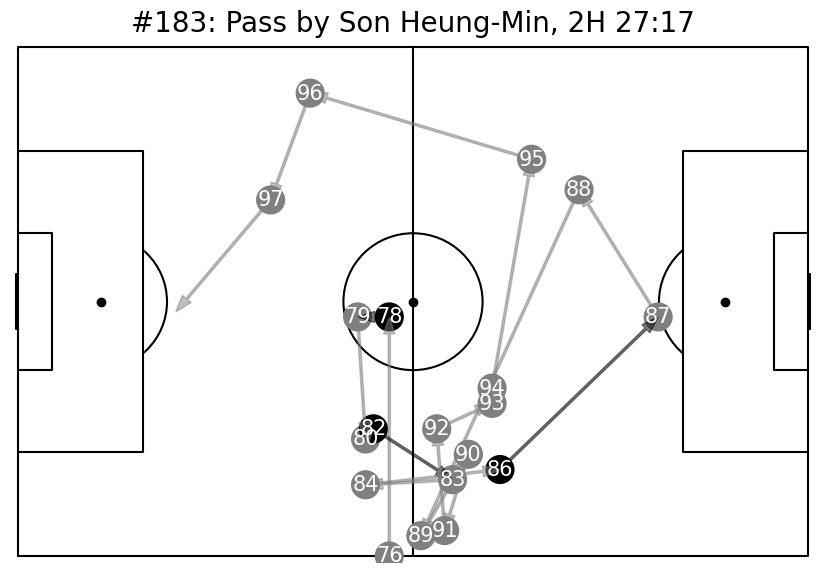

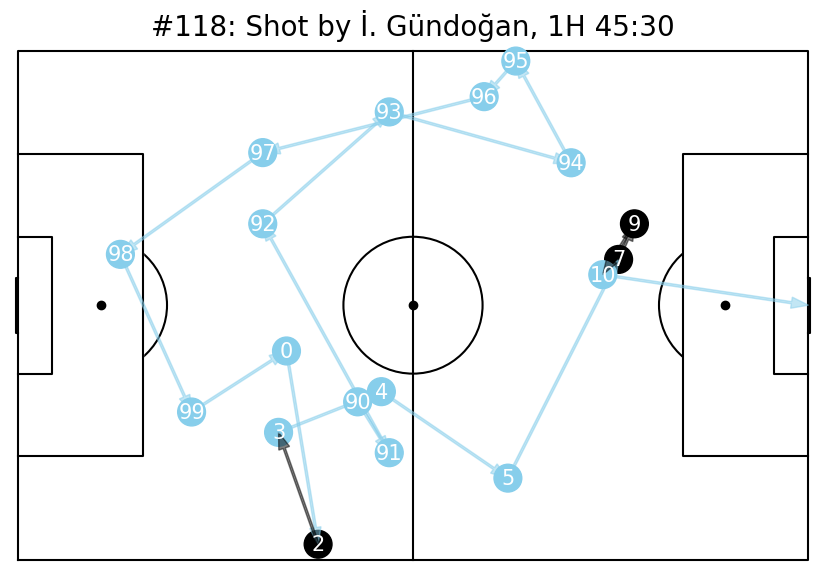

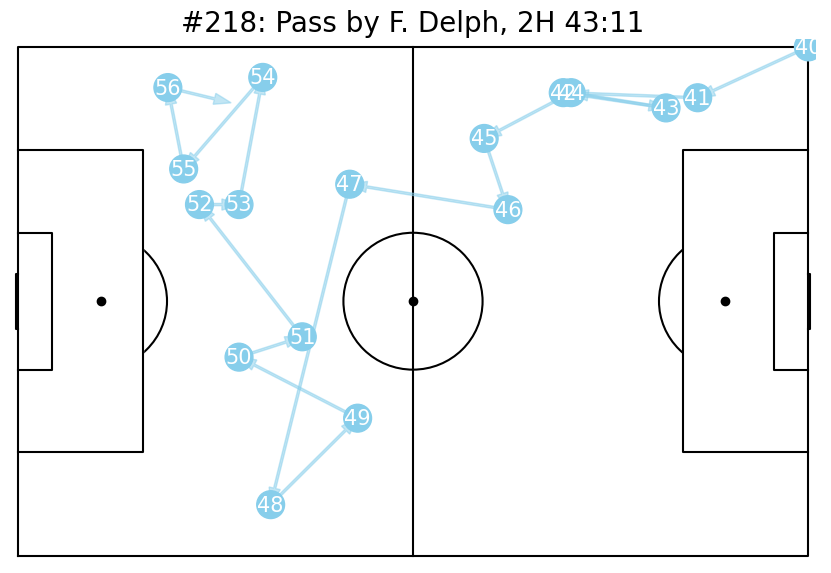

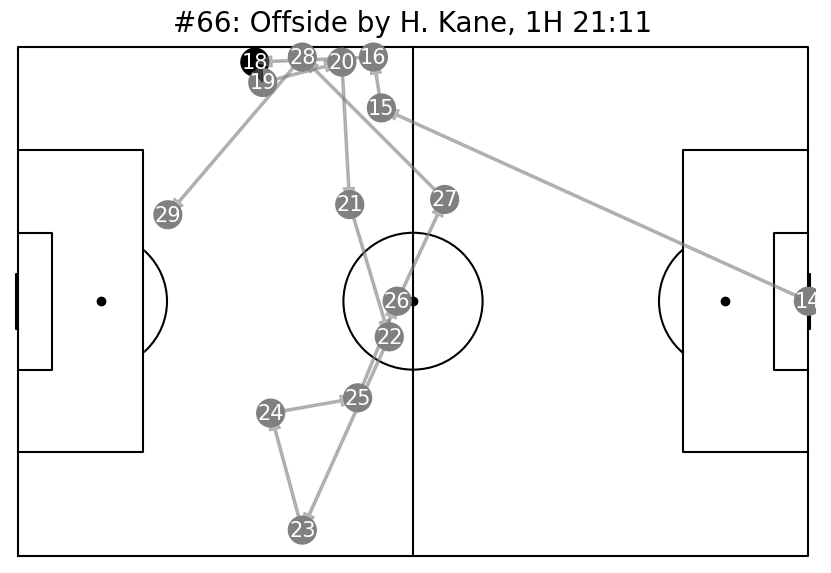

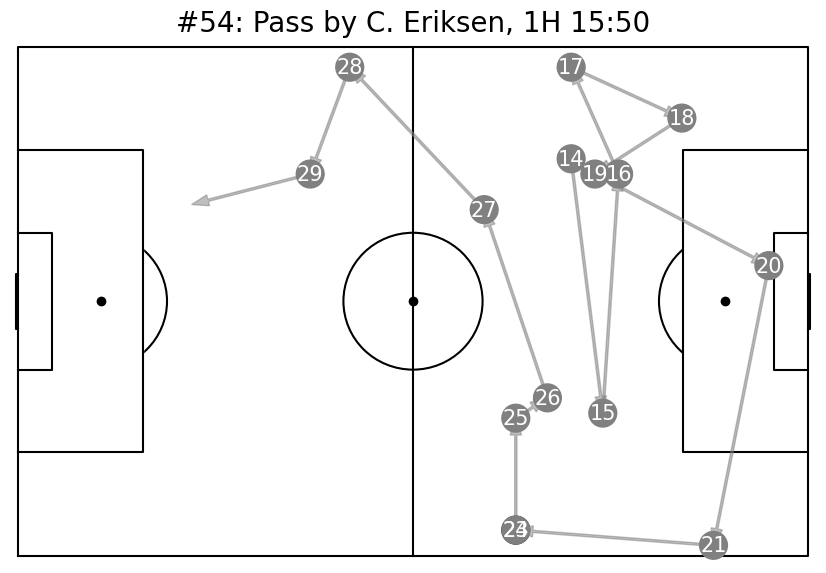

In [23]:
long_seq_records = seq_records.sort_values('len', ascending=False)[:5]

for i in long_seq_records.index:
    first_idx = long_seq_records.at[i, 'first_idx']
    last_idx = long_seq_records.at[i, 'last_idx']

    last_event_time = match_events.at[last_idx, 'display_time']
    last_event_type = match_events.at[last_idx, 'event_type']
    last_event_player = match_events.at[last_idx, 'player_name']
    last_event_tags = match_events.at[last_idx, 'tags']

    if 'Goal' in last_event_tags:
        title = f"#{i}: Goal by {last_event_player}, {last_event_time}"
    else:
        title = f"#{i}: {last_event_type} by {last_event_player}, {last_event_time}"

    visualize_sequence(match_events, first_idx, last_idx, title)

### 경기 내 공격 시퀀스 집계

##### (1) 단순 집계

In [24]:
seq_stats = pd.DataFrame(index=match_events['team_name'].unique())
seq_stats['mean_len'] = seq_records.groupby('team_name')['len'].mean().round(2)
seq_stats['att_seq_count'] = seq_records.groupby('team_name')['len'].count()
seq_stats

,mean_len,att_seq_count
Manchester City,5.64,106
Tottenham Hotspur,5.13,118


##### (2) 슈팅 시퀀스 비율 집계

In [25]:
seq_stats['shot_seq_count'] = shot_seq_records.groupby('team_name')['len'].count().rename('shot_seqs')
seq_stats['shot_seq_rate'] = (seq_stats['shot_seq_count'] / seq_stats['att_seq_count']).round(4)
seq_stats

,mean_len,att_seq_count,shot_seq_count,shot_seq_rate
Manchester City,5.64,106,15,0.1415
Tottenham Hotspur,5.13,118,2,0.0169


##### (3) 시퀀스 길이 분포 분석

- 시퀀스 길이별 횟수 집계

In [26]:
seq_len_counts = seq_records.pivot_table('first_idx', 'len', 'team_name', aggfunc='count', fill_value=0)
seq_len_counts

team_name,Manchester City,Tottenham Hotspur
len,,
2,23,42
3,20,11
4,11,14
5,8,8
6,7,14
7,8,9
8,7,0
9,6,3
10,3,4


- 막대그래프 시각화

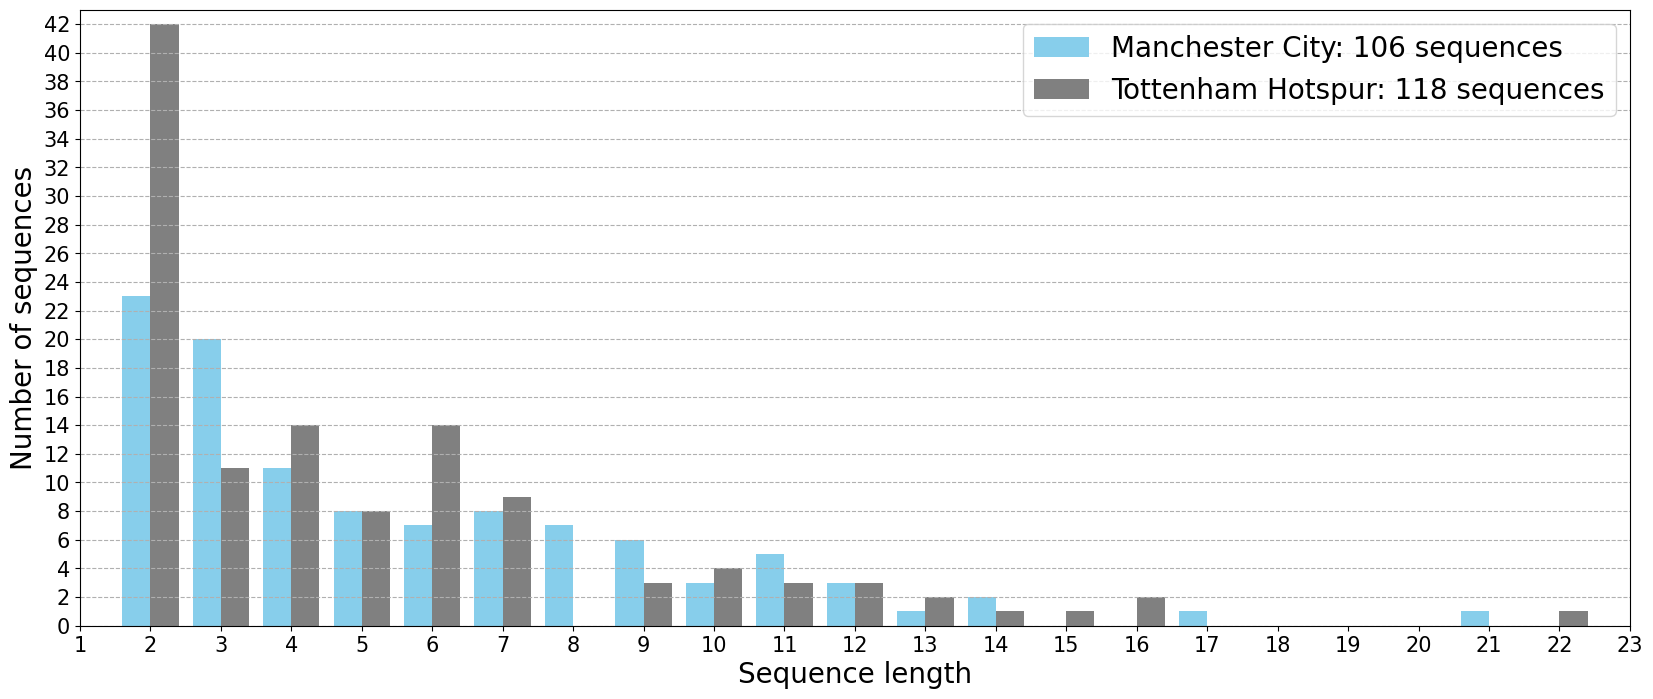

In [27]:
plt.figure(figsize=(20, 8))

team1_name, team2_name = seq_len_counts.columns
team1_label = f'{team1_name}: {seq_len_counts[team1_name].sum()} sequences'
team2_label = f'{team2_name}: {seq_len_counts[team2_name].sum()} sequences'
plt.bar(seq_len_counts.index - 0.2, seq_len_counts[team1_name], width=0.4, color='skyblue', label=team1_label) # - 0.2 하여 왼쪽 이동
plt.bar(seq_len_counts.index + 0.2, seq_len_counts[team2_name], width=0.4, color='grey', label=team2_label) # + 0.2 하여 왼쪽 이동

max_len = seq_len_counts.index[-1] + 1
max_count = seq_len_counts.max().max() + 1
plt.xticks(np.arange(max_len) + 1, fontsize=15)
plt.yticks(np.arange(0, max_count, 2), fontsize=15)
plt.xlim(1, max_len)
plt.ylim(0, max_count)
plt.xlabel('Sequence length', fontdict={'size': 20})
plt.ylabel('Number of sequences', fontdict={'size': 20})

plt.grid(axis='y', linestyle='--')
plt.legend(fontsize=20)
plt.show()

- 지금까지는 경기 하나에 대해서 분석해보았고, 시퀀스를 리그 전체에 대한 관점에서 살펴보도록 하자

### 대회 전체 공격 시퀀스 집계

##### (1) 대회 전체 이벤트 데이터를 하나의 DataFrame으로 연결하기

In [28]:
dataset_name = 'England'
match_df = pd.read_csv(f'data/refined_events/{dataset_name}/matches.csv', index_col=0, encoding='utf-8-sig')

match_events_list = []

for match_id in match_df.index:
    match_events = pd.read_pickle(f'data/refined_events/England/{match_id}.pkl')
    match_events_list.append(match_events)

events = pd.concat(match_events_list, ignore_index=True)
events['display_time'] = events.apply(
    lambda x: f"{x['period']} {int(x['time'] // 60):02d}:{int(x['time'] % 60):02d}", axis=1
)
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,display_time
0,2499719,177959171,1H,2.759,1609,Arsenal,25413,A. Lacazette,Pass,Simple pass,[Accurate],50.96,34.68,32.24,14.96,1H 00:02
1,2499719,177959172,1H,4.947,1609,Arsenal,370224,R. Holding,Pass,High pass,[Accurate],32.24,14.96,53.04,17.00,1H 00:04
2,2499719,177959173,1H,6.542,1609,Arsenal,3319,M. Özil,Pass,Head pass,[Accurate],53.04,17.00,36.40,19.72,1H 00:06
3,2499719,177959174,1H,8.143,1609,Arsenal,120339,Mohamed Elneny,Pass,Head pass,[Accurate],36.40,19.72,42.64,3.40,1H 00:08
4,2499719,177959175,1H,10.302,1609,Arsenal,167145,Bellerín,Pass,Simple pass,[Accurate],42.64,3.40,74.88,8.16,1H 00:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647247,2500089,251701859,2H,3010.063,1659,AFC Bournemouth,11669,C. Wilson,Pass,Head pass,[Not accurate],63.44,47.60,65.52,31.96,2H 50:10
647248,2500089,251701668,2H,3012.989,1646,Burnley,8433,S. Ward,Pass,High pass,[Not accurate],38.48,36.04,74.88,6.80,2H 50:12
647249,2500089,251701860,2H,3014.732,1659,AFC Bournemouth,134102,N. Aké,Others on the ball,Clearance,"[Interception, Not accurate]",29.12,61.20,28.08,68.00,2H 50:14
647250,2500089,251701861,2H,3018.672,1659,AFC Bournemouth,0,NaN,Interruption,Ball out of the field,[],28.08,68.00,NaN,NaN,2H 50:18


##### (2) 경기별 공격 시퀀스 검출 함수 구현

In [29]:
def detect_attacking_sequences(match_events):
    events_except_duels = match_events[match_events['event_type'] != 'Duel']

    seq_records = []
    event_idxs = [events_except_duels.index[0]]

    for i in events_except_duels.index[1:]:
        prev_event = match_events.loc[event_idxs[-1]]
        cur_event = match_events.loc[i]
        if (
            cur_event['period'] == prev_event['period'] and
            cur_event['event_type'] != 'Free kick' and
            cur_event['time'] - prev_event['time'] < 15 and
            cur_event['team_name'] == prev_event['team_name']
        ):
            event_idxs.append(i)
        else:
            seq_records.append({
                'team_name': match_events.at[event_idxs[0], 'team_name'],
                'first_idx': event_idxs[0],
                'last_idx': event_idxs[-1]
            })
            event_idxs = [i]

    seq_records = pd.DataFrame(seq_records)
    seq_records['len'] = seq_records['last_idx'] - seq_records['first_idx'] + 1
    seq_records = seq_records[seq_records['len'] >= 2].reset_index(drop=True)
    
    seq_records['last_x'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_x'])
    seq_records['last_y'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_y'])
    seq_records['last_event_type'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'event_type'])
    seq_records['last_event_tags'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'tags'])

    return seq_records

##### (3) 대회 전체 공격 시퀀스 및 슈팅 시퀀스 검출

In [30]:
seq_records = events.groupby('match_id').apply(detect_attacking_sequences)
seq_records

team_name  first_idx  last_idx  len  last_x  last_y  \
match_id                                                                  
2499719  0            Arsenal          0         5    6   74.88    8.16   
         1            Arsenal          9        14    6   52.00   27.88   
         2     Leicester City         15        19    5   23.92   64.60   
         3     Leicester City         21        24    4   73.84   57.80   
         4            Arsenal         25        26    2    4.16   31.96   
...                       ...        ...       ...  ...     ...     ...   
2500098  175  West Ham United     645615    645618    4   61.36   55.76   
         176          Everton     645619    645626    8   71.76   35.36   
         177  West Ham United     645627    645654   28   41.60   10.20   
         178  West Ham United     645658    645661    4  102.96   19.04   
         179          Everton     645662    645663    2    0.00   46.24   

                 last_event_type                      last_event_tags  
match_id                                                               
2499719  0                  Pass                       [Not accurate]  
         1                  Pass                       [Not accurate]  
         2                  Pass                       [Not accurate]  
         3                  Pass              [Through, Not accurate]  
         4                  Pass                           [Accurate]  
...                          ...                                  ...  
2500098  175                Foul                                   []  
         176  Others on the ball                                   []  
         177  Others on the ball                                   []  
         178                Pass  [Right foot, Blocked, Not accurate]  
         179        Interruption                                   []  

[84878 rows x 8 columns]

In [31]:
# 경기 마다 index가 초기화 되므로, index 자체를 초기화
seq_records = seq_records.reset_index(level=0).reset_index(drop=True)
seq_records

,match_id,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
0,2499719,Arsenal,0,5,6,74.88,8.16,Pass,[Not accurate]
1,2499719,Arsenal,9,14,6,52.00,27.88,Pass,[Not accurate]
2,2499719,Leicester City,15,19,5,23.92,64.60,Pass,[Not accurate]
3,2499719,Leicester City,21,24,4,73.84,57.80,Pass,"[Through, Not accurate]"
4,2499719,Arsenal,25,26,2,4.16,31.96,Pass,[Accurate]
...,...,...,...,...,...,...,...,...,...
84873,2500098,West Ham United,645615,645618,4,61.36,55.76,Foul,[]
84874,2500098,Everton,645619,645626,8,71.76,35.36,Others on the ball,[]
84875,2500098,West Ham United,645627,645654,28,41.60,10.20,Others on the ball,[]
84876,2500098,West Ham United,645658,645661,4,102.96,19.04,Pass,"[Right foot, Blocked, Not accurate]"


In [32]:
# 슛팅 시퀀스만 추출
shot_seq_records = seq_records[seq_records['last_event_type'] == 'Shot']
shot_seq_records

,match_id,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
5,2499719,Arsenal,36,46,11,91.52,40.12,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
14,2499719,Leicester City,88,91,4,99.84,32.64,Shot,"[Goal, Head/body, Opportunity, Position: Goal ..."
21,2499719,Arsenal,122,128,7,84.24,45.56,Shot,"[Left foot, Opportunity, Position: Out high le..."
35,2499719,Arsenal,240,249,10,78.00,47.60,Shot,"[Right foot, Opportunity, Position: Goal low l..."
49,2499719,Arsenal,389,394,6,93.60,41.48,Shot,"[Left foot, Blocked, Not accurate]"
...,...,...,...,...,...,...,...,...,...
84849,2500098,West Ham United,645407,645413,7,94.64,29.24,Shot,"[Left foot, Opportunity, Position: Out low lef..."
84852,2500098,West Ham United,645446,645451,6,89.44,40.80,Shot,"[Left foot, Blocked, Not accurate]"
84854,2500098,West Ham United,645454,645457,4,74.88,37.40,Shot,"[Left foot, Position: Out low left, Not accurate]"
84860,2500098,West Ham United,645529,645535,7,89.44,45.56,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."


##### (4) 팀별 공격 시퀀스 집계

- 팀별 공격 시퀀스 주요 지표 집계

In [33]:
seq_stats = pd.DataFrame(index=seq_records['team_name'].unique())
seq_stats['match_count'] = seq_records[['match_id', 'team_name']].drop_duplicates()['team_name'].value_counts()
seq_stats['mean_len'] = seq_records.groupby('team_name')['len'].mean().round(2)
seq_stats['att_seqs_per_match'] = seq_records.groupby('team_name')['len'].count() / seq_stats['match_count']
seq_stats['shot_seqs_per_match'] = shot_seq_records.groupby('team_name')['len'].count() / seq_stats['match_count']
seq_stats['shot_seq_rate'] = (seq_stats['shot_seqs_per_match'] / seq_stats['att_seqs_per_match']).round(4) # 슈팅 시퀀스 비율

- 슈팅 시퀀스 비율 기준 정렬

In [34]:
seq_stats.sort_values('shot_seq_rate', ascending = False)

,match_count,mean_len,att_seqs_per_match,shot_seqs_per_match,shot_seq_rate
Manchester City,38,8.47,109.710526,12.763158,0.1163
Liverpool,38,6.78,115.973684,12.447368,0.1073
Tottenham Hotspur,38,6.47,117.210526,11.789474,0.1006
Chelsea,38,6.52,115.473684,11.552632,0.1000
Arsenal,38,7.00,114.052632,10.921053,0.0958
Manchester United,38,6.55,110.184211,9.500000,0.0862
AFC Bournemouth,38,5.44,114.368421,7.605263,0.0665
Southampton,38,5.67,116.052632,7.368421,0.0635
Newcastle United,38,4.98,111.184211,6.921053,0.0622
Crystal Palace,38,5.23,110.236842,6.710526,0.0609


- 공격 시퀀스 평균 길이 기준 정렬

In [35]:
seq_stats.sort_values('mean_len', ascending = False)

,match_count,mean_len,att_seqs_per_match,shot_seqs_per_match,shot_seq_rate
Manchester City,38,8.47,109.710526,12.763158,0.1163
Arsenal,38,7.00,114.052632,10.921053,0.0958
Liverpool,38,6.78,115.973684,12.447368,0.1073
Manchester United,38,6.55,110.184211,9.500000,0.0862
Chelsea,38,6.52,115.473684,11.552632,0.1000
Tottenham Hotspur,38,6.47,117.210526,11.789474,0.1006
Southampton,38,5.67,116.052632,7.368421,0.0635
Swansea City,38,5.61,104.842105,4.578947,0.0437
AFC Bournemouth,38,5.44,114.368421,7.605263,0.0665
Watford,38,5.43,113.026316,6.710526,0.0594


##### (5) 최장 득점 시퀀스 추출 및 시각화

In [36]:
goal_seq_records = seq_records[seq_records['last_event_tags'].apply(lambda x: 'Goal' in x)]
long_goal_seq_records = goal_seq_records.sort_values('len', ascending = False)[:10]
long_goal_seq_records

,match_id,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
12343,2499774,Manchester City,89994,90031,38,85.28,45.56,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
13963,2499782,Burnley,112933,112967,35,91.52,36.04,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
41392,2499904,Manchester City,317232,317263,32,97.76,35.36,Shot,"[Goal, Head/body, Opportunity, Position: Goal ..."
8938,2499759,Brighton & Hove Albion,66255,66283,29,97.76,40.12,Shot,"[Goal, Head/body, Opportunity, Position: Goal ..."
22003,2499818,Manchester City,159413,159439,27,100.88,34.68,Shot,"[Goal, Left foot, Opportunity, Position: Goal ..."
37809,2499889,Liverpool,302561,302586,26,90.48,39.44,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
76407,2500060,Arsenal,581764,581788,25,97.76,20.40,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
24864,2499831,Brighton & Hove Albion,200083,200107,25,92.56,25.84,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
66469,2500016,Manchester City,509157,509181,25,92.56,35.36,Shot,"[Goal, Left foot, Opportunity, Position: Goal ..."
60570,2499990,Manchester City,475516,475539,24,98.80,36.04,Shot,"[Goal, Left foot, Opportunity, Position: Goal ..."


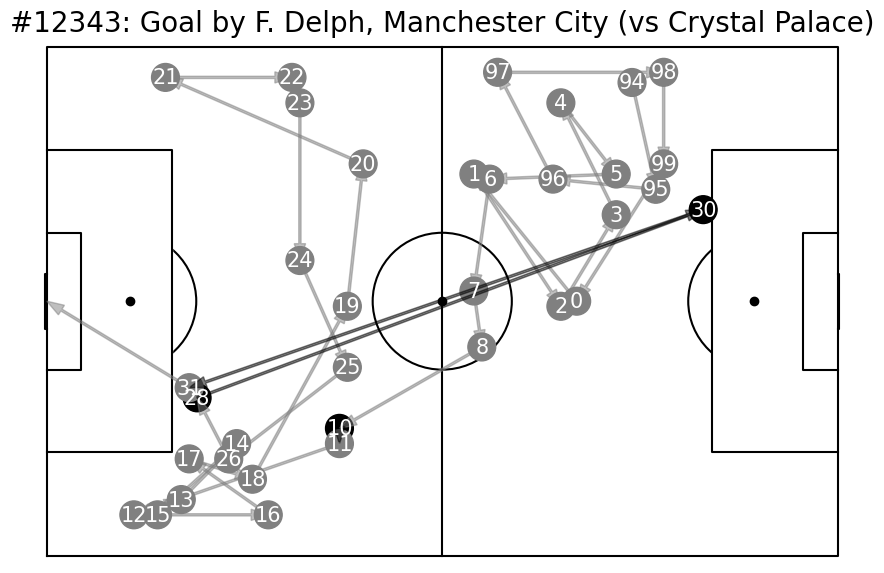

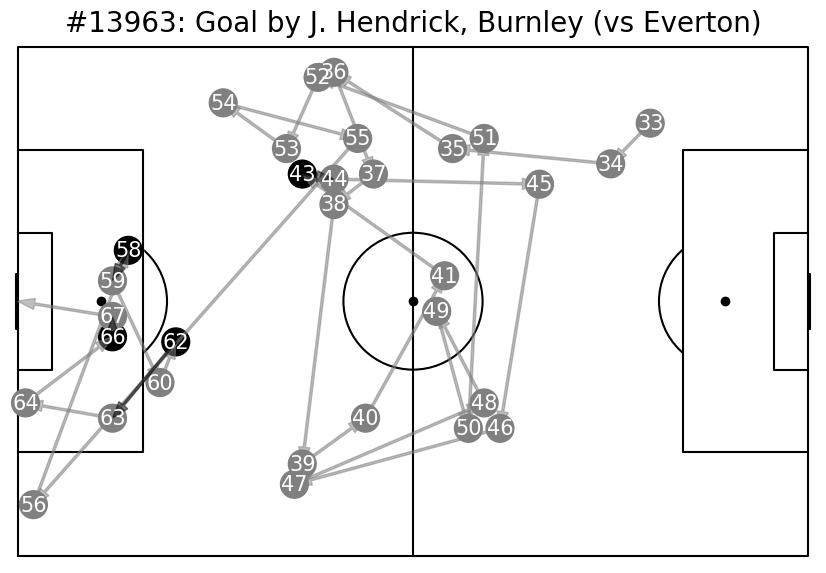

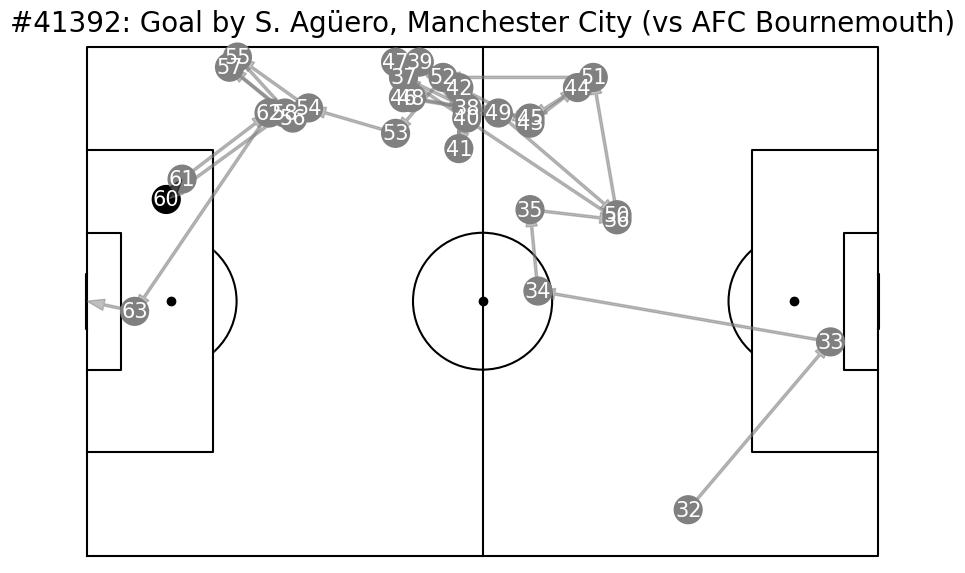

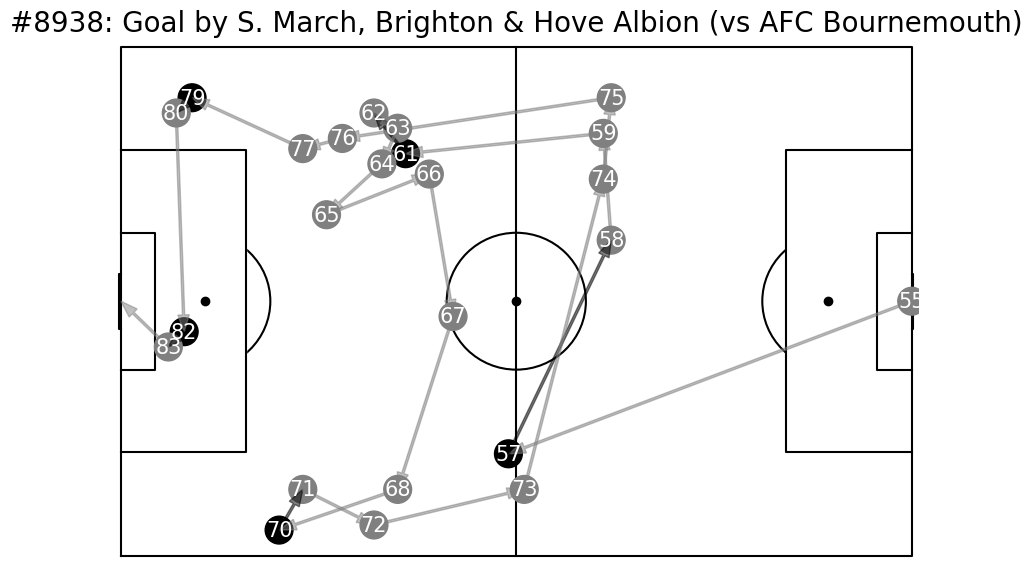

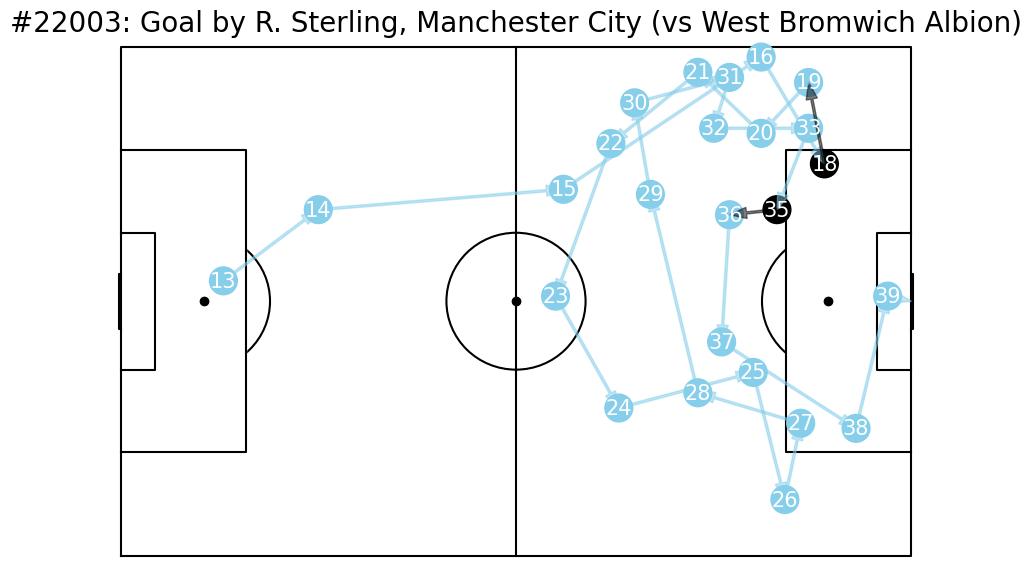

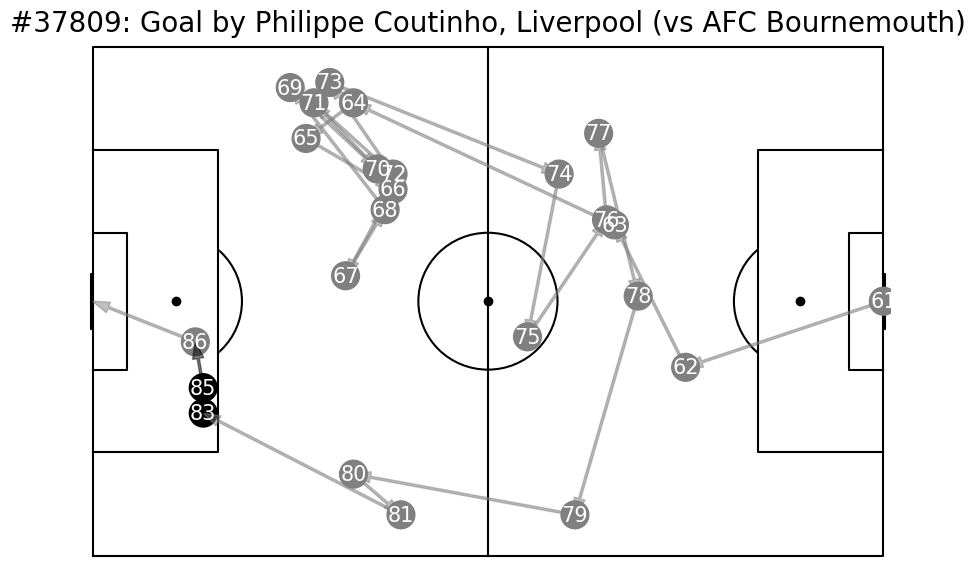

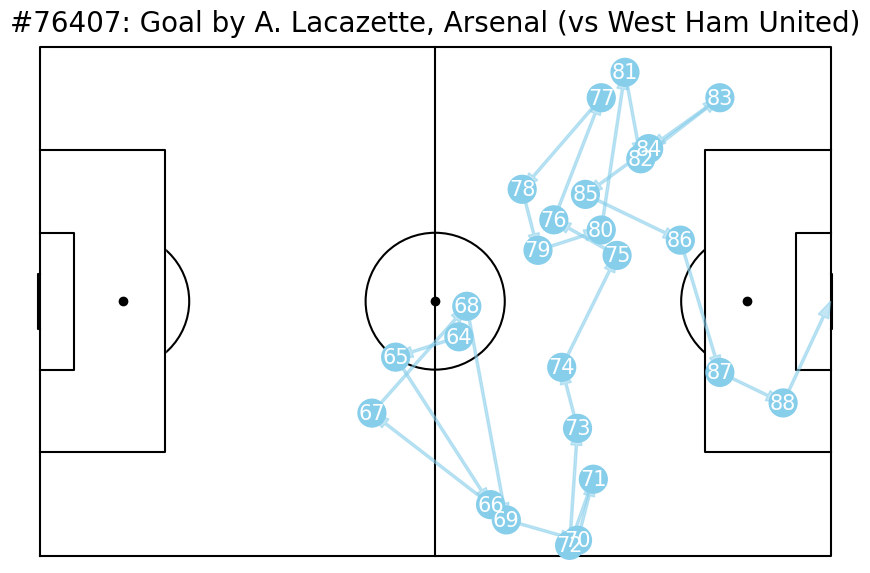

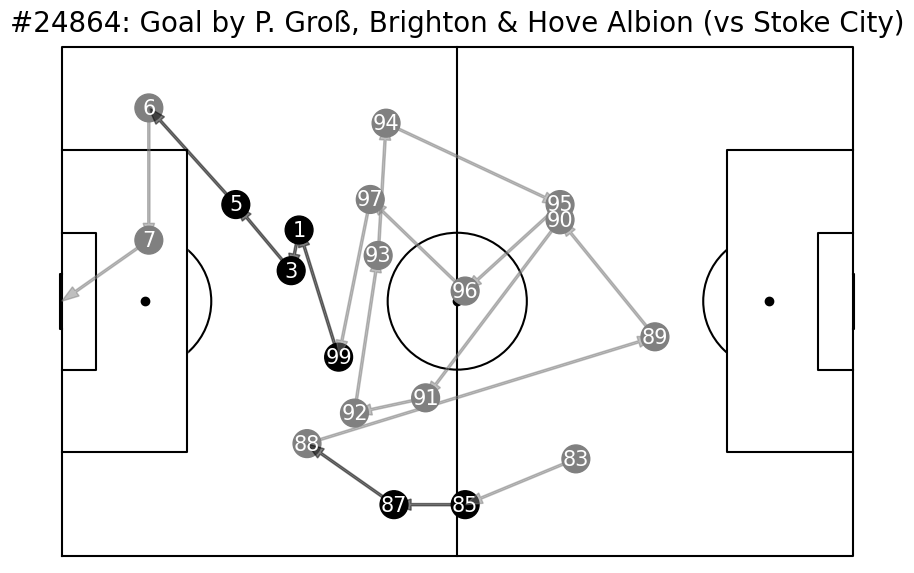

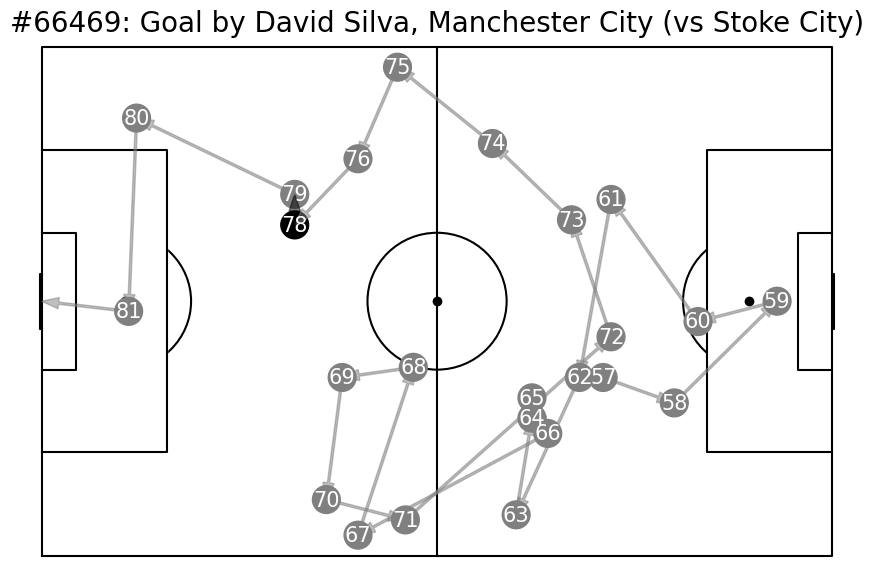

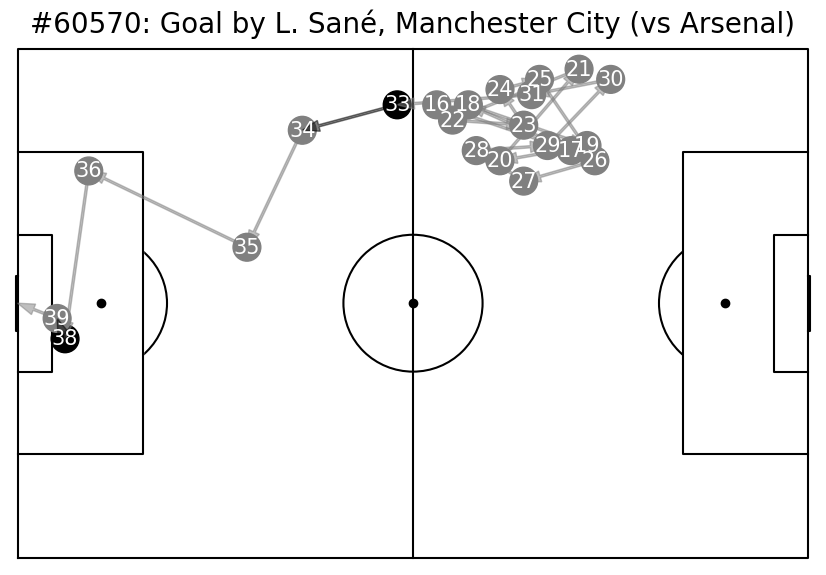

In [37]:
for i in long_goal_seq_records.index:
    first_idx = long_goal_seq_records.at[i, 'first_idx']
    last_idx = long_goal_seq_records.at[i, 'last_idx']

    match_id = events.at[first_idx, 'match_id']
    match_events = events[events['match_id'] == match_id]
    team_names = match_events['team_name'].unique()

    last_event_player = match_events.at[last_idx, 'player_name']
    last_event_tags = match_events.at[last_idx, 'tags']

    team_name = match_events.at[last_idx, 'team_name']
    opponent_name = [x for x in team_names if x != team_name][0]
    title = f"#{i}: Goal by {last_event_player}, {team_name} (vs {opponent_name})"
    visualize_sequence(match_events, first_idx, last_idx, title, rotate_team2_events=True)